<a href="https://colab.research.google.com/github/sunilbssengg/Analyzing-KPI-Degradation-Report/blob/main/Analyzing_KPI_Degradation_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Objective: To analyze Key Performance Indicator (KPI) degradation in a telecom Radio Access Network (RAN) dataset. By visualizing the relationships between various KPIs, alarms, and cell health, the goal was to pinpoint specific parameters and regions contributing to network instability and poor performance.
Key Findings & Insights:
•	Identified specific Site IDs with consistently unhealthy cells, often correlated with high ERAB Drop Rates and low RRC Success Rates, ENDC drop etc.
•	Discovered regional disparities in cell health and alarm counts, with certain regions exhibiting higher concentrations of critical alarms (e.g., NewYork had the highest total alarm count).
•	Visualized the interplay between multiple KPIs (ERAB Drop Rate, RRC Success Rate, DL Throughput) and Cell Health, revealing that degraded throughput often accompanies poor cell health and higher drop rates.
•	Categorized alarm types by region, providing granular insights into prevalent issues (e.g., Transmission Alarms were a significant contributor across several regions).
Technologies & Libraries Used:
•	Python
•	Pandas (for data manipulation and analysis)
•	Matplotlib (for comprehensive data visualization)
•	Seaborn (for enhanced statistical plots)
•	Google Colab (for development and execution environment)


Analyzing KPI Degradation Report
This section focuses on analyzing the Key Performance Indicator (KPI) degradation report. We will visualize the relationships between different KPIs to identify parameters contributing to performance degradation.


Data Loading and Initial Inspection
We begin by loading the KPI raw data file, which was sourced from the USM (Unified Service Management) system. This step is crucial for preparing our dataset for subsequent analysis of KPI degradation.
I have chosen 10 sites (a small dataset) for KPI troubleshooting."

In [3]:
import pandas as pd

# Read the raw KPI data from the CSV file into a pandas DataFrame.
df_customer= pd.read_csv("/content/telecom_ran_dataset1.csv")

# Display the first 10 rows of the DataFrame to inspect its structure and data.
df_customer.head(10)

,Site_ID,Technology,Vendor,Region,RRC_Success_Rate,ERAB_Drop_Rate,DL_Throughput,UL_Throughput,PRB_Utilization_DL,PRB_Utilization_UL,...,Critical_Alarms_Count,Major_Alarms_Count,VSWR_Alarm,GPS_Sync_Alarm,Transmission_Alarm,CPU_Utilization,Memory_Usage,DL_User_Count,UL_User_Count,Cell_Health
0,NY_Site1,4G,Samsung,NewYork,94.041007,4.049301,118.180624,13.122588,70.277901,68.071908,...,1,7,1,0,1,88.144449,38.442829,93,246,1
1,Chi_Site,3G,Nokia,Cincinnati,92.997656,4.736976,49.025471,43.448329,46.213575,7.678609,...,3,8,1,1,0,62.523026,81.981987,245,115,0
2,NY_Site2,5G,Ericsson,NewYork,92.008475,1.686701,50.195025,9.066793,36.820617,15.336447,...,1,8,0,0,1,78.870420,19.452444,270,184,0
3,NJ_Site1,5G,Samsung,NewJersy,78.983305,3.624906,5.455431,21.341122,66.293025,58.812236,...,3,2,0,1,1,10.310300,34.853480,227,27,0
4,Taxes_Site1,4G,Nokia,Taxes,75.204402,2.694065,30.265293,1.702214,23.937182,81.417039,...,3,4,1,1,1,86.550058,72.273649,240,103,1
5,Dallas_1,4G,Ericsson,Dallas,89.126598,0.303145,131.933816,24.438439,43.569985,58.018217,...,3,5,0,0,1,22.003256,53.456879,157,41,1
6,NY_Site2,4G,Samsung,NewYork,84.884992,3.449999,69.053241,2.030034,28.813333,16.392116,...,2,5,0,0,1,28.086838,76.586651,61,111,0
7,Chi_Site2,3G,Nokia,Cincinnati,75.347574,3.450483,147.714002,41.160868,72.621547,14.839604,...,1,9,0,0,1,9.799706,18.927631,116,45,1
8,NY_Site3,5G,Ericsson,NewYork,90.577338,4.653034,62.377655,41.417835,94.978795,76.755801,...,1,7,1,1,0,91.886011,83.644334,19,233,0
9,NJ_Site4,5G,Samsung,NewJersy,99.733793,2.486562,108.702036,39.599367,99.595987,16.840699,...,0,5,0,0,0,81.680976,84.792944,273,61,1



This section provides a visualization of the health status for the entire network or a specific cluster."

,count
Cell_Health,
1,6
0,5


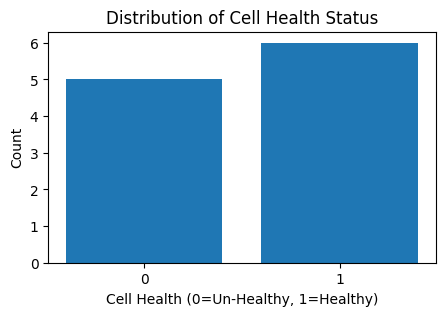

In [4]:
import matplotlib.pyplot as plt

# Calculate the distribution (counts) of each unique value in the 'Cell_Health' column.
# This helps to understand how many cells are healthy (1) vs. unhealthy (0).
df2 = df_customer['Cell_Health'].value_counts()

# Display the calculated value counts for 'Cell_Health'.
display(df2)

# Create a new figure for the bar plot with a specified size.
plt.figure(figsize=(5, 3))

# Generate a bar plot using the index (Cell Health categories) and values (counts) from df2.
plt.bar(df2.index, df2.values)

# Set the title of the plot to clearly describe its content.
plt.title("Distribution of Cell Health Status")

# Label the x-axis to indicate what the bars represent.
plt.xlabel("Cell Health (0=Un-Healthy, 1=Healthy)")

# Label the y-axis to indicate the number of occurrences.
plt.ylabel("Count")

# Ensure that all unique cell health categories (0 and 1) are clearly shown on the x-axis.
plt.xticks(df2.index)

# Display the generated plot.
plt.show()

Cell Health Status by Site
This section visualizes the health status of each cell across different sites. This granular view helps in identifying specific sites experiencing cell health issues.
Sits is down it will represent as null or zero.

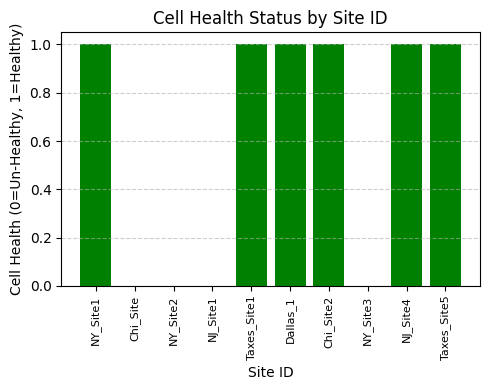

In [5]:
import matplotlib.pyplot as plt

# Select the 'Site_ID' column for the x-axis.
df3 = df_customer['Site_ID']

# Select the 'Cell_Health' column for the y-axis.
df4 = df_customer['Cell_Health']

# Create a new figure for the bar plot with a specified size.
plt.figure(figsize=(5, 4))

# Generate a bar plot showing Cell Health status for each Site ID.
plt.bar(df3, df4, color='green')

# Set the title of the plot to clearly describe its content.
plt.title('Cell Health Status by Site ID')

# Label the x-axis.
plt.xlabel('Site ID')

# Label the y-axis to indicate the meaning of the values.
plt.ylabel('Cell Health (0=Un-Healthy, 1=Healthy)')

# Rotate x-axis labels by 90 degrees and reduce font size for better readability, especially with many sites.
plt.xticks(rotation=90, fontsize=8)

# Add a grid to the y-axis for easier value estimation.
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout to prevent labels from overlapping and ensure all elements are visible.
plt.tight_layout()

# Display the generated plot.
plt.show()

Cell Health Status by Region
This section presents the cell health status aggregated by geographical region. Understanding regional distribution of healthy and unhealthy cells can highlight areas requiring focused attention.


<Figure size 600x500 with 0 Axes>

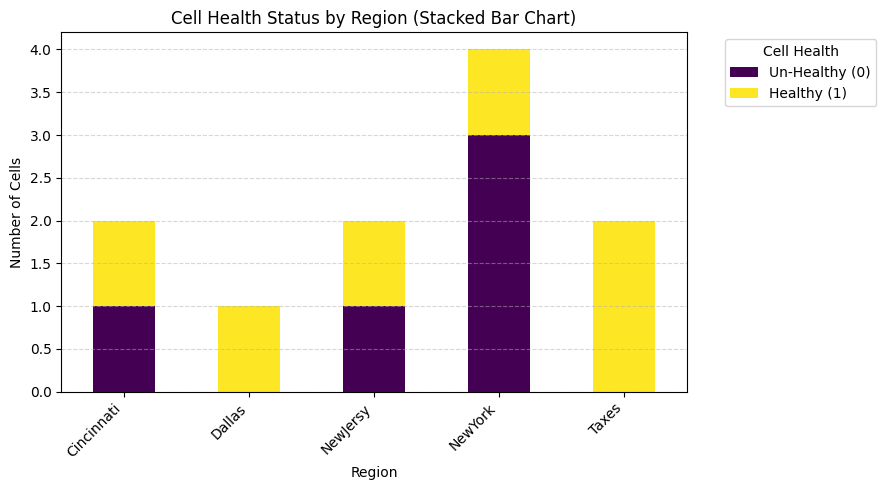

In [13]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Region' and 'Cell_Health', then count the occurrences.
# Unstack the 'Cell_Health' level to have 'Healthy' (1) and 'Un-Healthy' (0) as separate columns.
# Fill any missing values with 0, ensuring all combinations are represented.
cell_health_by_region = df_customer.groupby(['Region', 'Cell_Health']).size().unstack(fill_value=0)

# Create a new figure for the plot.
plt.figure(figsize=(6, 5))

# Generate a stacked bar plot to visualize the distribution of cell health within each region.
# 'stacked=True' ensures that healthy and unhealthy counts stack on top of each other.
cell_health_by_region.plot(kind='bar', stacked=True, figsize=(9, 5), colormap='viridis')

# Set the title of the plot for clarity.
plt.title('Cell Health Status by Region (Stacked Bar Chart)')

# Label the x-axis.
plt.xlabel('Region')

# Label the y-axis.
plt.ylabel('Number of Cells')

# Rotate x-axis labels by 45 degrees and align them to the right for better readability.
plt.xticks(rotation=45, ha='right')

# Add a legend to explain what each color in the bars represents.
# Ensure labels clearly indicate 'Un-Healthy (0)' and 'Healthy (1)'.
plt.legend(title='Cell Health', labels=['Un-Healthy (0)', 'Healthy (1)'], loc='upper left', bbox_to_anchor=(1.05, 1))

# Add a grid to the y-axis for easier comparison of values.
plt.grid(axis='y', linestyle='--', alpha=0.5);

# Adjust layout to prevent labels from overlapping and ensure all elements are visible.
plt.tight_layout()

# Display the generated plot.
plt.show()

Detailed Cell Health Status by Region
This section provides a detailed breakdown of cell health (healthy vs. unhealthy) within each region using a grouped bar chart. This visualization allows for a direct comparison of cell health categories across different regions, aiding in pinpointing specific regional challenges.


<Figure size 1300x1000 with 0 Axes>

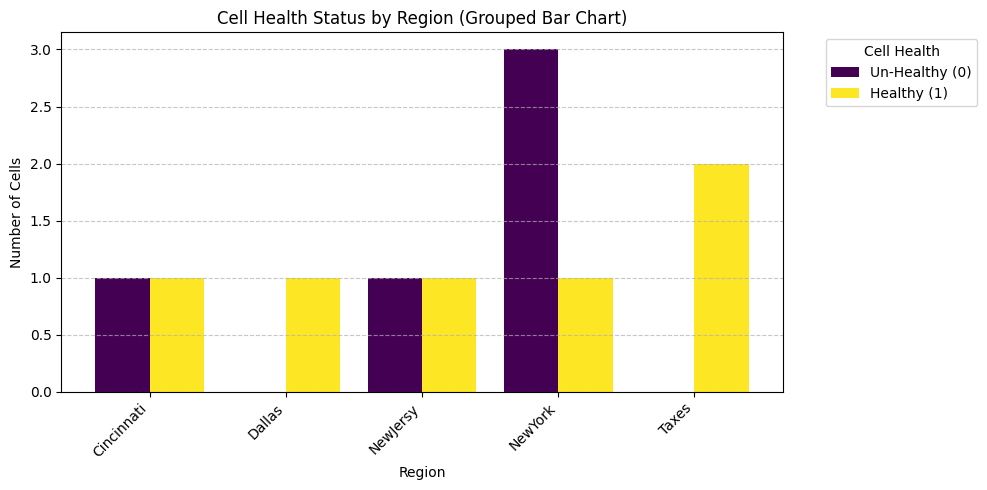

In [18]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Region' and 'Cell_Health', then count the occurrences.
# Unstack the 'Cell_Health' level to have 'Healthy' (1) and 'Un-Healthy' (0) as separate columns.
# Fill any missing values with 0, ensuring all combinations are represented.
cell_health_by_region = df_customer.groupby(['Region', 'Cell_Health']).size().unstack(fill_value=0)

# Create a new figure for the plot with a specified size.
plt.figure(figsize=(13, 10))

# Generate a grouped bar chart to visualize the distribution of cell health within each region.
# 'stacked=False' is the default, making it a grouped bar chart where healthy and unhealthy bars are side-by-side.
cell_health_by_region.plot(kind='bar', figsize=(10, 5), colormap='viridis', width=0.8)

# Set the title of the plot for clarity.
plt.title('Cell Health Status by Region (Grouped Bar Chart)')

# Label the x-axis.
plt.xlabel('Region')

# Label the y-axis.
plt.ylabel('Number of Cells')

# Rotate x-axis labels by 45 degrees and align them to the right for better readability.
plt.xticks(rotation=45, ha='right')

# Add a legend to explain what each color in the bars represents.
# Position the legend outside the plot area (to the upper left) to avoid overlapping with data.
plt.legend(title='Cell Health', labels=['Un-Healthy (0)', 'Healthy (1)'], loc='upper left', bbox_to_anchor=(1.05, 1))

# Add a grid to the y-axis for easier comparison of values.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent labels from overlapping and ensure all elements are visible.
plt.tight_layout()

# Display the generated plot.
plt.show()

Individual KPI and Cell Health Analysis by Site
This section presents separate plots for ERAB Drop Rate, RRC Success Rate, and Cell Health, each analyzed with respect to the Site ID. This individual visualization allows for a focused analysis of each KPI's behavior at different sites, which is crucial for diagnosing specific degradation issues.


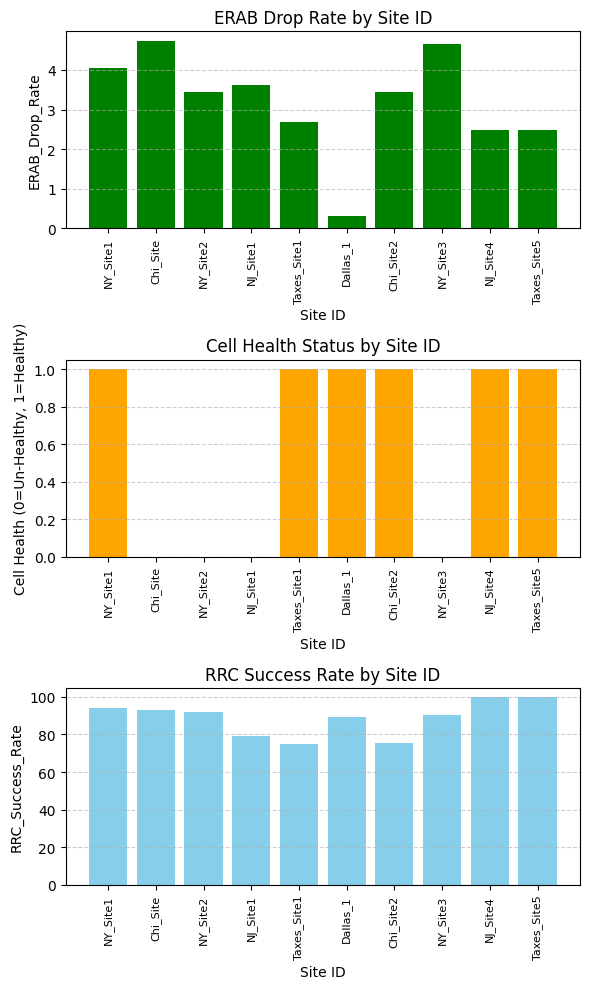

In [19]:
import matplotlib.pyplot as plt

# Select the 'Site_ID' column for the x-axis for all plots.
df3 = df_customer['Site_ID']
# Select the 'ERAB_Drop_Rate' column for the first subplot.
df4 = df_customer['ERAB_Drop_Rate']
# Select the 'Cell_Health' column for the second subplot.
df5 = df_customer['Cell_Health']
# Select the 'RRC_Success_Rate' column for the third subplot.
df6 = df_customer['RRC_Success_Rate']

# Create a figure and a set of subplots. Adjust figure size to accommodate three subplots vertically.
plt.figure(figsize=(6, 10))

# --- Subplot 1: ERAB Drop Rate by Site ID ---
plt.subplot(3, 1, 1) # This specifies a 3-row, 1-column grid, and this is the 1st plot.
plt.bar(df3, df4, color='green')
plt.title('ERAB Drop Rate by Site ID')
plt.xlabel('Site ID')
plt.ylabel('ERAB_Drop_Rate')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# --- Subplot 2: Cell Health by Site ID ---
plt.subplot(3, 1, 2) # This is the 2nd plot in the 3-row, 1-column grid.
plt.bar(df3, df5, color='orange')
plt.title('Cell Health Status by Site ID')
plt.xlabel('Site ID')
plt.ylabel('Cell Health (0=Un-Healthy, 1=Healthy)')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# --- Subplot 3: RRC Success Rate by Site ID ---
plt.subplot(3, 1, 3) # This is the 3rd plot in the 3-row, 1-column grid.
plt.bar(df3, df6, color='skyblue')
plt.title('RRC Success Rate by Site ID')
plt.xlabel('Site ID')
plt.ylabel('RRC_Success_Rate')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout to prevent labels from overlapping and ensure all elements are visible.
plt.tight_layout()
# Display the generated plots.
plt.show()

Combined KPI and Cell Health Analysis by Site
This section displays a combined plot of ERAB Drop Rate, RRC Success Rate, and Cell Health against Site ID. This integrated visualization allows for a holistic analysis of these critical parameters on a single graph, facilitating the identification of interdependencies and potential degradation causes at specific sites.


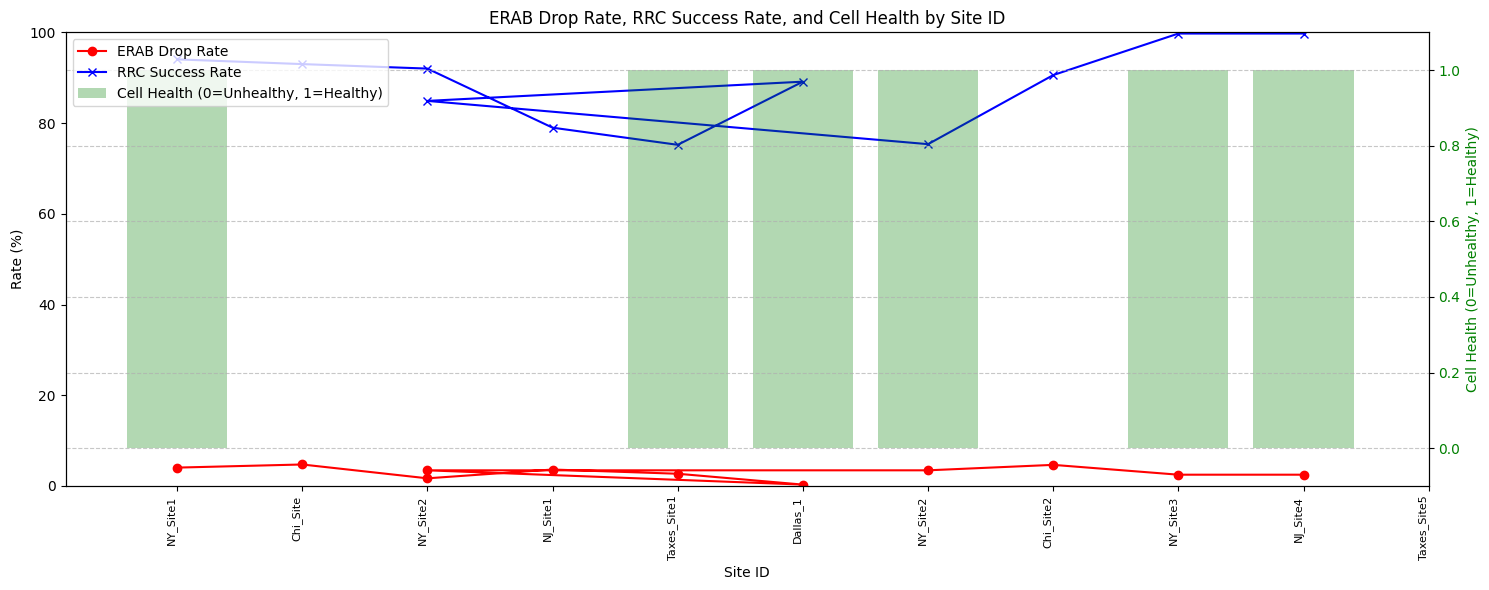

In [20]:
import matplotlib.pyplot as plt

# Create a figure and a primary y-axis (ax1) for ERAB Drop Rate and RRC Success Rate.
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot 'ERAB_Drop_Rate' on ax1.
ax1.plot(df_customer['Site_ID'], df_customer['ERAB_Drop_Rate'], color='red', label='ERAB Drop Rate', marker='o')
# Plot 'RRC_Success_Rate' on ax1.
ax1.plot(df_customer['Site_ID'], df_customer['RRC_Success_Rate'], color='blue', label='RRC Success Rate', marker='x')

# Set the x-axis label for ax1.
ax1.set_xlabel('Site ID')
# Set the primary y-axis label, and color it black for consistency.
ax1.set_ylabel('Rate (%)', color='black')
# Set tick parameters for the primary y-axis label color.
ax1.tick_params(axis='y', labelcolor='black')
# Set the y-axis limits for rates, assuming they are between 0 and 100.
ax1.set_ylim(0, 100)

# Create a secondary y-axis (ax2) that shares the same x-axis as ax1.
ax2 = ax1.twinx()
# Plot 'Cell_Health' as a bar chart on ax2. Use alpha for transparency.
ax2.bar(df_customer['Site_ID'], df_customer['Cell_Health'], color='green', alpha=0.3, label='Cell Health (0=Unhealthy, 1=Healthy)')
# Set the secondary y-axis label and color it green.
ax2.set_ylabel('Cell Health (0=Unhealthy, 1=Healthy)', color='green')
# Set tick parameters for the secondary y-axis label color.
ax2.tick_params(axis='y', labelcolor='green')
# Set the y-axis limits for Cell Health, allowing for 0 or 1 values with some padding.
ax2.set_ylim(-0.1, 1.1)

# Set the overall title of the plot.
plt.title('ERAB Drop Rate, RRC Success Rate, and Cell Health by Site ID')

# Set x-ticks to correspond to each Site ID and rotate labels for readability.
ax1.set_xticks(range(len(df_customer['Site_ID'])))
ax1.set_xticklabels(df_customer['Site_ID'], rotation=90, ha='right', fontsize=8)

# Combine handles and labels from both axes to create a single legend.
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Add a grid to the y-axis for better readability.
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Adjust layout to prevent labels from overlapping and ensure all elements are visible.
plt.tight_layout()
# Display the generated plot.
plt.show()

Combined KPI Analysis by Site (Excluding Cell Health)
This section displays a combined plot focusing on DL Throughput, ERAB Drop Rate, and RRC Success Rate across different Site IDs. This visualization allows for a detailed analysis of the interplay between these key performance indicators, helping to pinpoint their individual and collective contributions to potential degradation issues at specific sites.

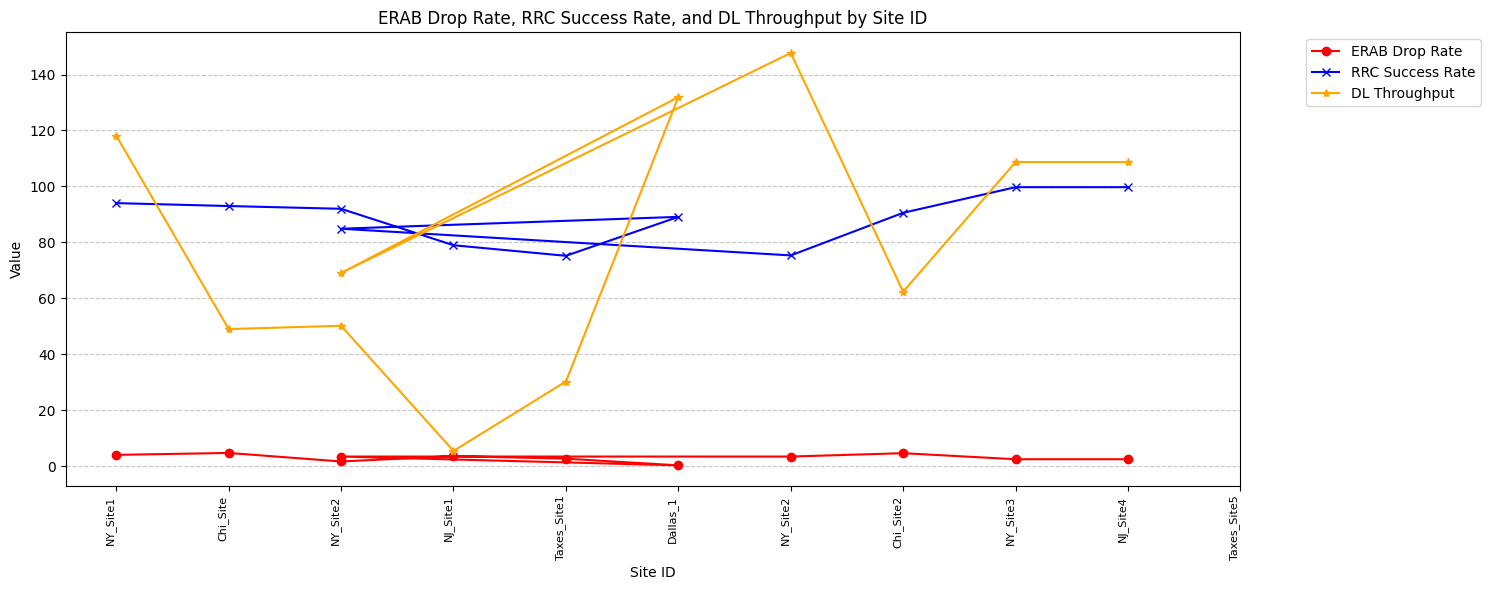

In [22]:
import matplotlib.pyplot as plt

# Create a figure and a single y-axis (ax1) for ERAB Drop Rate, RRC Success Rate, and DL Throughput.
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot 'ERAB_Drop_Rate' on ax1.
ax1.plot(df_customer['Site_ID'], df_customer['ERAB_Drop_Rate'], color='red', label='ERAB Drop Rate', marker='o')
# Plot 'RRC_Success_Rate' on ax1.
ax1.plot(df_customer['Site_ID'], df_customer['RRC_Success_Rate'], color='blue', label='RRC Success Rate', marker='x')
# Plot 'DL_Throughput' on ax1.
ax1.plot(df_customer['Site_ID'], df_customer['DL_Throughput'], color='orange', label='DL Throughput', marker='*')

# Set the x-axis label for ax1.
ax1.set_xlabel('Site ID')
# Set the y-axis label. It is generalized to 'Value' as it represents different KPI types.
ax1.set_ylabel('Value', color='black')
# Set tick parameters for the y-axis label color.
ax1.tick_params(axis='y', labelcolor='black')
# Removed set_ylim(0, 100) as DL_Throughput might exceed this range, and this plot combines different scales.

# Set the overall title of the plot.
plt.title('ERAB Drop Rate, RRC Success Rate, and DL Throughput by Site ID')

# Set x-ticks to correspond to each Site ID and rotate labels for better readability.
ax1.set_xticks(range(len(df_customer['Site_ID'])))
ax1.set_xticklabels(df_customer['Site_ID'], rotation=90, ha='right', fontsize=8)

# Add legend and position it outside the plot area.
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Add a grid to the y-axis for better readability.
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Adjust layout to prevent labels from overlapping and ensure all elements are visible.
plt.tight_layout()
# Display the generated plot.
plt.show()

Categorized Alarm Counts by Site
This section categorizes and visualizes the different types of alarms (VSWR, GPS Sync, and Transmission) across various geographical regions. This detailed breakdown by region and alarm type provides granular insights into specific problem areas, enabling more effective troubleshooting and resource allocation.


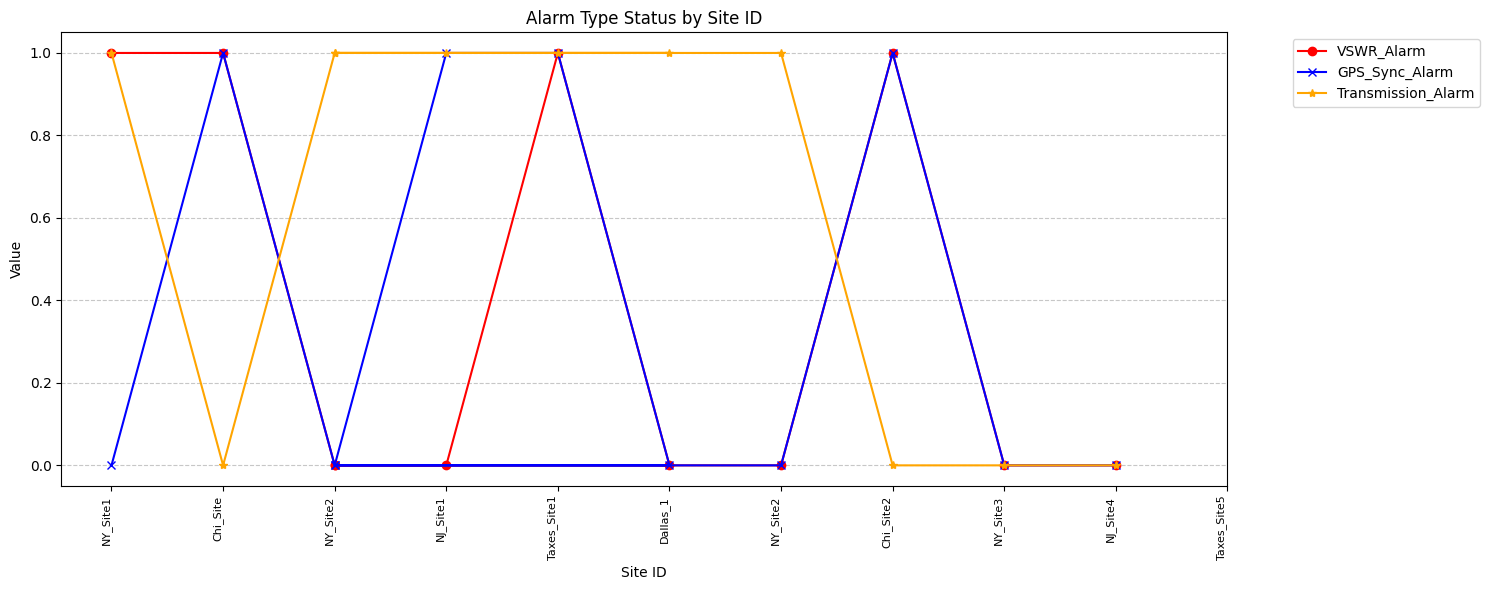

In [23]:
import matplotlib.pyplot as plt

# Create a figure and a single y-axis (ax1) for plotting alarm types.
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot 'VSWR_Alarm' on ax1. This indicates issues with antenna systems.
ax1.plot(df_customer['Site_ID'], df_customer['VSWR_Alarm'], color='red', label='VSWR_Alarm', marker='o')
# Plot 'GPS_Sync_Alarm' on ax1. This indicates problems with GPS synchronization, crucial for network timing.
ax1.plot(df_customer['Site_ID'], df_customer['GPS_Sync_Alarm'], color='blue', label='GPS_Sync_Alarm', marker='x')
# Plot 'Transmission_Alarm' on ax1. This indicates issues with data transmission.
ax1.plot(df_customer['Site_ID'], df_customer['Transmission_Alarm'], color='orange', label='Transmission_Alarm', marker='*')

# Set the x-axis label.
ax1.set_xlabel('Site ID')
# Set the y-axis label. It is generalized to 'Value' as it represents different alarm types (typically 0 or 1 for presence).
ax1.set_ylabel('Value', color='black')
# Set tick parameters for the y-axis label color.
ax1.tick_params(axis='y', labelcolor='black')

# Set the overall title of the plot.
plt.title('Alarm Type Status by Site ID') # Updated title for clarity

# Set x-ticks to correspond to each Site ID and rotate labels for better readability.
ax1.set_xticks(range(len(df_customer['Site_ID'])))
ax1.set_xticklabels(df_customer['Site_ID'], rotation=90, ha='right', fontsize=8)

# Add legend and position it outside the plot area to prevent overlap.
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Add a grid to the y-axis for better readability.
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Adjust layout to prevent labels from overlapping and ensure all elements are visible.
plt.tight_layout()
# Display the generated plot.
plt.show()

Categorized Alarm Counts by Region
This section categorizes and visualizes the different types of alarms (VSWR, GPS Sync, and Transmission) across various geographical regions. This detailed breakdown by region and alarm type provides granular insights into specific problem areas, enabling more effective troubleshooting and resource allocation.


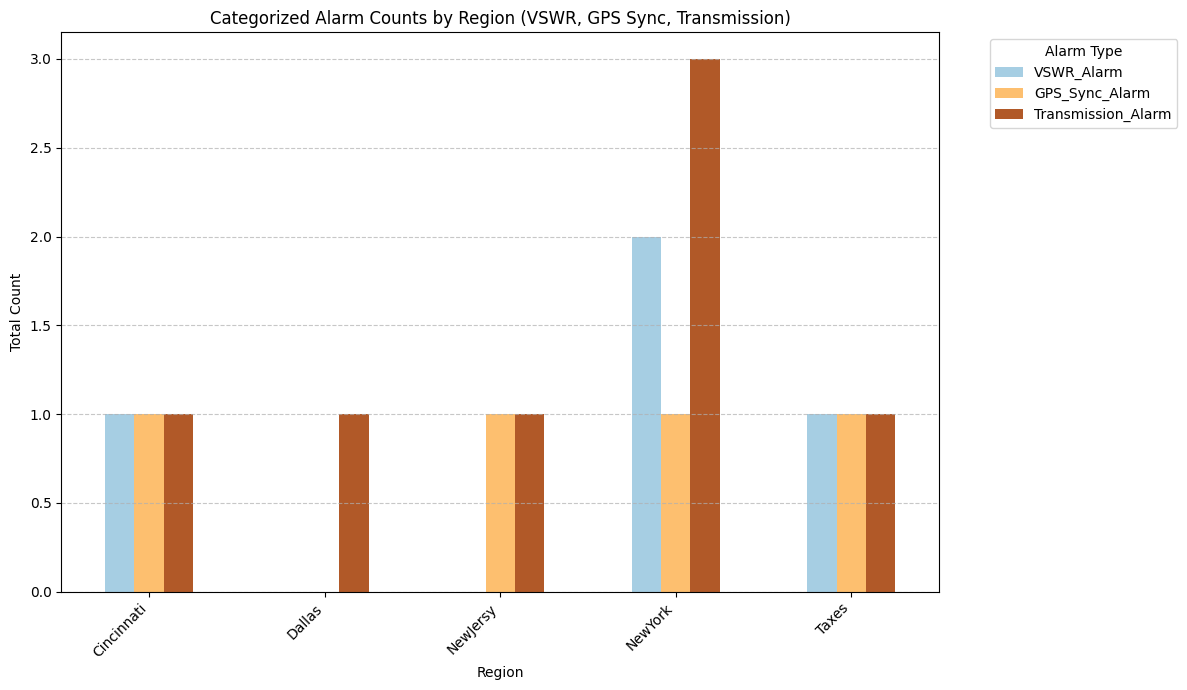

In [24]:
import matplotlib.pyplot as plt

# Define the columns that represent different alarm types.
alarm_columns = ['VSWR_Alarm', 'GPS_Sync_Alarm', 'Transmission_Alarm']

# Group the DataFrame by 'Region' and sum the counts for each specific alarm type.
# This results in a DataFrame where each row is a region and columns are alarm types with their sums.
alarm_counts_by_region_detailed = df_customer.groupby('Region')[alarm_columns].sum()

# Generate a grouped bar plot to visualize the counts of each alarm type per region.
alarm_counts_by_region_detailed.plot(kind='bar', figsize=(12, 7), rot=45, colormap='Paired')

# Set the title of the plot for clarity.
plt.title('Categorized Alarm Counts by Region (VSWR, GPS Sync, Transmission)')

# Label the x-axis to identify the different regions.
plt.xlabel('Region')

# Label the y-axis to indicate the total count of alarms.
plt.ylabel('Total Count')

# Rotate x-axis labels by 45 degrees and align them to the right for better readability.
plt.xticks(rotation=45, ha='right')

# Add a legend to explain what each color represents (i.e., each alarm type).
# Position the legend outside the plot area to prevent overlap with the bars.
plt.legend(title='Alarm Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a grid to the y-axis for easier comparison of values.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent labels from overlapping and ensure all elements are visible.
plt.tight_layout()

# Display the generated plot.
plt.show()